# Пример использования коэффициента Жаккара

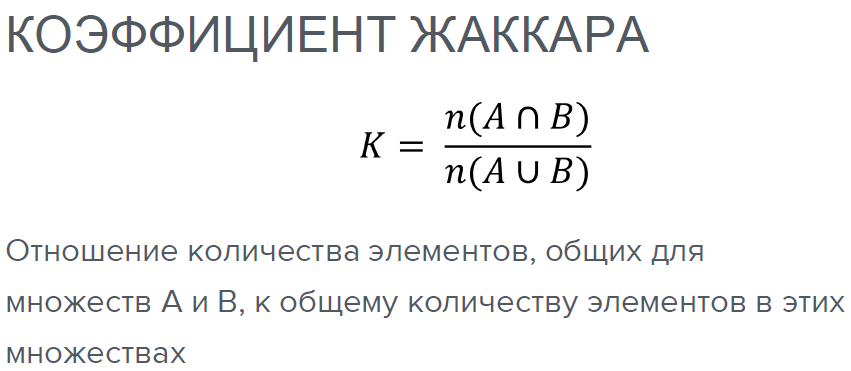

In [1]:
import pandas as pd

Данные по ценам на товары

In [2]:
prices = pd.read_csv( 'ids_and_prices.csv' )
prices.head()

,id,price
0,b000jz4hqo,0.00
1,b0006zf55o,0.00
2,b00004tkvy,0.00
3,b000g80lqo,599.99
4,b0006se5bq,99.99


Описания товаров e-commerce на основании выгрузки из базы данных

**id** - уникальный идентификатор товара в базе товаров <br>
**name** - название товара, согласно товарной номенклатуре <br>
**описание** - описание товара <br>
**manufacturer** - производитель, большая часть данных по производителям товаров отсутствует, незначимый критерий <br>

In [3]:
details = pd.read_csv( 'ids_and_details.csv' )
details.head()

,id,name,description,manufacturer
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN
1,b00004tkvy,the beginners bible: noah's ark activity cente...,NaN,NaN
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN


Проверяем на наличие дубликатов

Они есть

In [4]:
details['id'].value_counts().sort_values( ascending = False ).head()

b00006jo4g    5
b00006sijq    4
b000090179    4
b0001wn16m    4
b00006sijr    4
Name: id, dtype: int64

In [5]:
details.drop_duplicates( subset = 'id', keep = 'first', inplace = True )

In [6]:
# проверяем, что дубликатов нет

details['id'].value_counts().sort_values( ascending = False ).head()

b000fzz77q    1
b000edjjhs    1
b000ndibe6    1
b000eqazb4    1
b00030iej6    1
Name: id, dtype: int64

In [7]:
# для пустых описаний NaN подставим пустую строку
# это изменит тип ячейки (с числовой на строковую) и позволит избежать в дальнейшем ошибки

details['description'].fillna( '', inplace = True )
details.head()

,id,name,description,manufacturer
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN
1,b00004tkvy,the beginners bible: noah's ark activity cente...,,NaN
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN


Совмещаем данные по описаниям и ценам

In [8]:
data = details.merge(prices, on = 'id', how = 'left')
data.head()

,id,name,description,manufacturer,price
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN,0.00
1,b00004tkvy,the beginners bible: noah's ark activity cente...,,NaN,0.00
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN,599.99
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN,99.99
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN,499.99


### Поиск близких описаний

Допустим, мы добавили к нашей таблице новый товар с описанием. Как проверить, что добавленный товар имеет более менее "уникальное описание"? 

Например, мы можем для описания каждого товара из таблицы посчитать количество слов, совпадающих с описанием нового товара. Для удобства для каждого описания из таблицы будем брать долю одинаковых слов от количества слов в описании нового товара.

Таким образом, если описания товаров сильно близки, то наша доля будет приближаться к 100%. Если описание товара из таблицы не имеет общих слов с новым, то доля будет равна 0. Для удобства отсортируем конечную таблицу по убыванию нашей метрики близости.

In [9]:
# пусть "новым товаром" будет один из товаров в нашей таблице

newText = 'encore software 10741 : new! the print shop 22 deluxe offers the best in total personal creativity. 350000+ images & graphics plus 20000+ project templates! packed with new features and tools you have everything you need for satisfy your creative ...'
newText

'encore software 10741 : new! the print shop 22 deluxe offers the best in total personal creativity. 350000+ images & graphics plus 20000+ project templates! packed with new features and tools you have everything you need for satisfy your creative ...'

In [10]:
# для сравнения описаний пословно разобьем наш текст на слова

newTextSplit = set( newText.split(' ') )
newTextSplit

{'&',
 '...',
 '10741',
 '20000+',
 '22',
 '350000+',
 ':',
 'and',
 'best',
 'creative',
 'creativity.',
 'deluxe',
 'encore',
 'everything',
 'features',
 'for',
 'graphics',
 'have',
 'images',
 'in',
 'need',
 'new',
 'new!',
 'offers',
 'packed',
 'personal',
 'plus',
 'print',
 'project',
 'satisfy',
 'shop',
 'software',
 'templates!',
 'the',
 'tools',
 'total',
 'with',
 'you',
 'your'}

In [11]:
# мы хотим в итоге считать отношение общих слов двух описаний к количеству слов в описании нового товара text
# в нашем примере 39 слов

len( newTextSplit ) 

39

Для каждой строки нашей исходной таблицы посчитаем новый столбец similarity. 

Т. е. для каждого описания из столбца description (data['description']) мы применяем делаем определенное вычисление. Для этого используется метод apply:

1. Для каждого описания (назовем его descr) мы получаем список слов в нем - set( descr.split(' ') )
2. Затем получаем список общих слов с описанием нового товара - list( set( descr.split(' ') ) & textSplit )
3. Считаем длину получившегося пересечения len( list( set( descr.split(' ') ) & textSplit ) )
4. Наконец, считаем отношение пересечения к количеству слов в новом описании

In [12]:
def countCrossWords( row, newTextSplit ):
    """
    Считаем общее количество слов в описании нового товара newTextSplit и описания текущего товара row['description'].
    
    newTextSplit имеет вид:
    {
        '&',
        '...',
        '10741',
        ...
        'you',
        'your'
    }
    
    row['description'] - просто текст описания очередного товара    
    """
    
    # список слов в описании очередного товара
    currentDescriptionWordsSet = set( row['description'].split(' ') )
    
    # список общих слов в описании текущего (row['description']) и нового (newTextSplit) товара
    commonWords = currentDescriptionWordsSet & newTextSplit
    
    return len( commonWords ) / len( newTextSplit )

Считаем близость описания к новому товару

In [13]:
data['similarity'] = data.apply( countCrossWords, axis = 1, args = (newTextSplit,) )
data.head()

,id,name,description,manufacturer,price,similarity
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN,0.00,0.282051
1,b00004tkvy,the beginners bible: noah's ark activity cente...,,NaN,0.00,0.000000
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN,599.99,0.102564
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN,99.99,0.102564
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN,499.99,0.102564


Посмотрим список товаров с самим близким описанием

In [15]:
result = data.sort_values( by = 'similarity', ascending = False )
result.head(10)

,id,name,description,manufacturer,price,similarity
652,b000hed3fi,encore software 10741 - the print shop 22 delu...,encore software 10741 : new! the print shop 22...,NaN,49.95,1.000000
714,b000b57k4s,encore software 10038 - encore the print shop ...,encore software 10038 : the print shop 21 delu...,NaN,0.00,0.871795
391,b000aa87go,print shop deluxe 21,overview when you're ready to add a creative t...,NaN,49.99,0.384615
33,b000h22rbg,the printshop v22 deluxe,overview create professional projects with all...,NaN,49.99,0.333333
28,b000h22pg8,the printshop pro publisher v22 deluxe dvd-rom,overview create professional projects with all...,NaN,99.99,0.333333
818,b000gihfyu,encore software 10593 - encore tlc clue finder...,encore software 10593 : build a bevy of sharp ...,NaN,19.99,0.307692
805,b000fp0k0u,encore software 10478 - encore printmaster v.1...,encore software 10478 : if you've got a passio...,NaN,30.66,0.307692
768,b000fowht8,encore software 10485 - encore printmaster v.1...,encore software 10485 : if you've got a passio...,NaN,39.99,0.282051
720,b000i4rmfe,ahead software 70115 - nero 7 ultra edition en...,ahead software 70115 : nero 7 ultra edition en...,NaN,99.99,0.282051
239,b000gkli0a,encore software 10566 - encore hoyle card game...,encore software 10566 : step up to the best de...,NaN,29.99,0.282051


Средняя цена для этих товаров

In [16]:
result.iloc[1:6]['price'].mean()

43.992000000000004